## Stock Sentiment_analysis

In [173]:
# importing libraries
import  pandas as pd   # to deal with data processing
import numpy as np     # to deal with array data
import matplotlib.pyplot as plt   # for visualization
import seaborn       # for visualization
import nltk            # NLP library
from nltk.corpus import stopwords   # stopwords of any language

### 1) Reading the data

In [174]:
df=pd.read_csv('Data.csv',encoding='ISO-8859-1')
df.head(2)  # reading top two(by index) rows

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [175]:
# Label is the target variable 1 indicates stock price increases and 0 indicate stock price decreases

### 2)Splitting the data into training and testing 

In [176]:
train=df[df.Date<'20150101']
test=df[df.Date>'20141231']

### 3) Data preprocessing for train data

In [177]:
# removing functuations
data=train.iloc[:,2:]
data.replace('[^a-zA-Z]',' ',regex=True,inplace=True)



In [178]:
# renaming columns
data.columns=[ i for i in range(len(data.columns))]

In [179]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite


In [180]:
# converting headlines to lowercases
for i in data.columns:
    data[i]=data[i].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [181]:
# Combining all columns and making one sentence (for all rows)
headlines=[]
for i in range(len(data)):
    headlines.append(' '.join(str(x) for x in data.iloc[i,:]))
    
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [182]:
# coverting data into bag of words
from sklearn.feature_extraction.text import CountVectorizer  # bag of words
from sklearn.ensemble import RandomForestClassifier          #random forest classifier ml model

cv=CountVectorizer(ngram_range=(2,2))
trained_cv_data=cv.fit_transform(headlines)

### 4) Fitting the model

In [183]:
model=RandomForestClassifier (n_estimators=200,criterion='entropy')
model.fit(trained_cv_data,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

### 5) Predict for the test data

In [184]:
test_data=test.iloc[:,2:]

In [185]:
# changing columns
test_data.columns=[i for i in range(len(test_data.columns))]

In [186]:
test_data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3723,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,Salaries for top CEOs rose twice as fast as av...,"Norway violated equal-pay law, judge says: Jud...",...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...


In [187]:
# combining all columns and making paragraph (for all rows)
head_test=[]
for i in range(len(test_data)):
    head_test.append(' '.join(str(x) for x in test_data.iloc[i,:]))
    
head_test[0]

'Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: "The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it" Poll: One in 8 Germans would join anti-Muslim marches UK royal family\'s Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or "some big city". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city of Karachi are be

In [188]:
# converting to bag of words
test_cv_data=cv.transform(head_test)

In [189]:
test_cv_data.shape

(378, 584289)

In [190]:
# predicting for test_data
y_pred=model.predict(test_cv_data)

### 6) Model evaluation

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

In [192]:
accuracy_score(test['Label'],y_pred)

0.8677248677248677

In [193]:
confusion_matrix(test['Label'],y_pred)

array([[141,  45],
       [  5, 187]], dtype=int64)

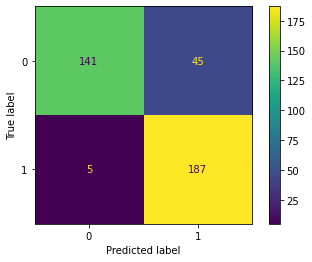

In [194]:
plot_confusion_matrix(model,test_cv_data,test['Label'])
plt.show()